# Makine Öğrenmesi Notları

## Giriş

## Doğrusal Regresyon ve Kuzenleri

Türleri

* Basit Doğrusal Regresyon

* Çoklu Doğrusal Regresyon

* Temel Bileşen Regresyonu

* Kısmi En Küçük Kareler Regresyonu

* Ridge Regresyonu

* Lasso Regresyonu

* Elastic Net Regresyon

Her model için:
        
        - Model
        
        - Tahmin
        
        - Model Optimizasyonu 

## Doğrusal Regrasyon (Linear Regression)

In [3]:
import pandas as pd

Veri setinin okunması

In [4]:
ad = pd.read_csv('advertising.csv',usecols=[1,2,3,4])

Veri setleri üzerinde işlem yapmadan önce mutlaka kopyası alınmalıdır.

In [5]:
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Eğer index buradaki gibi değişken gibi alınmışsa şu işlemler yapılır. Çünkü indexlerle genelde işlemler yapılmaz.

iloc[:,1:len(df)] ---> tüm değişkenleri seç 1den en sonuna kadar git. 

Veriyi okurken, usecols=[1,2,3,...] şeklinde bir argüman belirmekte aynı işlemi yapar.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Eksik veri olup olmadığına bakalım

In [8]:
df.isnull().values.any()

False

Dağılımları ve kolerasyonları

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [10]:
import seaborn as sns

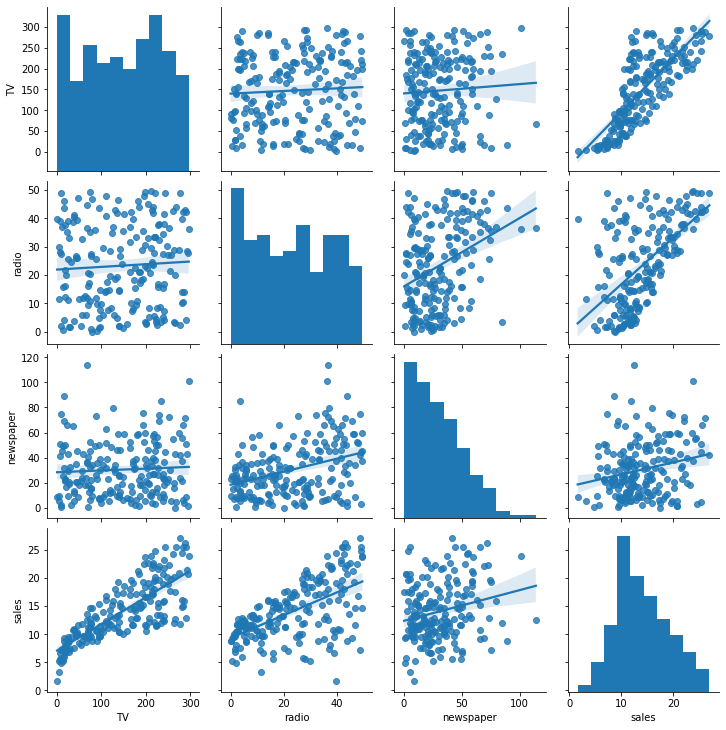

In [11]:
sns.pairplot(df,kind='reg');

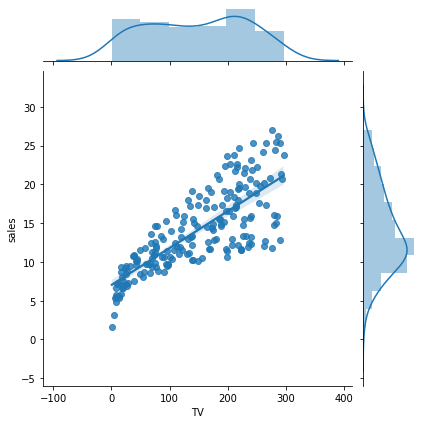

In [12]:
sns.jointplot(x = 'TV',y = 'sales',data=df, kind='reg');

## Stats ile modelleme

In [13]:
import statsmodels.api as sm

In [14]:
X = df[['TV']]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [16]:
y =df[['sales']]
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [17]:
lm = sm.OLS(y,X)

In [36]:
model = lm.fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        13:37:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [44]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [40]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV",df) #değişkeni belirlemede farklılaştırma
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        13:37:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# modelin parametreleri

In [57]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [58]:
#katsayı detayları

In [59]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [61]:
# katsayıların güven aralığı

In [62]:
models.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [63]:
#modelin anlamlılığına ilişkin istatistikleri

In [50]:
model.f_pvalue

1.4673897001947095e-42

In [51]:
print("f_pvalue:","%.4f" %models.f_pvalue )

f_pvalue: 0.0000


In [64]:
# f-istatistiği

In [52]:
print("fvalue:","%.4f" %models.fvalue )

f_pvalue: 312.1450


In [65]:
# parametrelerin anlamlılığına ilişkin değerler

In [66]:
print("tvalue:","%.4f" %models.tvalues[0:1] )

tvalue: 15.3603


In [67]:
# modelin anlamlılığına ilişkin hata kareler 

In [54]:
models.mse_model

3314.6181668686486

In [70]:
#r kare

In [68]:
model.rsquared

0.611875050850071

In [71]:
#düzeltilmiş r kare

In [72]:
model.rsquared_adj

0.6099148238341623

In [75]:
# modelin tahmin ettiği değerler

In [76]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [78]:
#gerçek değerler

In [79]:
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [80]:
#modelin denklemi 

In [81]:
print("Sales = " + str ("%.2f" % model.params[0]+" + TV"+"*"+str("%.2f" %models.params[1])))

Sales = 7.03 + TV*0.05


In [96]:
import seaborn as sns

AttributeError: module 'matplotlib' has no attribute 'xlim'

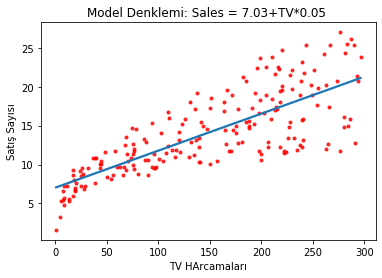

In [97]:
g = sns.regplot(df["TV"],df['sales'], ci=None, scatter_kws={'color':'r','s':9})
g.set_title('Model Denklemi: Sales = 7.03+TV*0.05 ')
g.set_ylabel('Satış Sayısı')
g.set_xlabel('TV HArcamaları')
plt.xlim(-10,310)
plt.ylim(bottom=0);

## Scikit-Learn ile 

In [98]:
from sklearn.linear_model import LinearRegression

In [107]:
X = df['TV']
y = df['sales']
reg = LinearRegression()
model = reg.fit((X,y))
model.intercept_

TypeError: fit() missing 1 required positional argument: 'y'

In [108]:
model.coef_

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [110]:
model.score(X,y) # r kare

AttributeError: 'OLSResults' object has no attribute 'score'

In [112]:
model.predict(X)[0:10]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

## Tahmin 

Model Denklemi 

Sales = 7.03+TV*0.05

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [114]:
7.03+30*0.05

8.530000000000001

In [115]:
model.predict([[30]])

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: TypeError: list indices must be integers or slices, not str
    sales ~ TV
            ^^

In [117]:
yeni_veri = [[5],[90],[200]]

In [118]:
model.predict(yeni_veri)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: TypeError: list indices must be integers or slices, not str
    sales ~ TV
            ^^

## Artıklar ve Makine Öğrenmesindeki Önemi

In [119]:
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
lm = smf.ols("sales ~ TV",df)

In [127]:
model = lm.fit()

In [128]:
mse = mean_squared_error(y,model.fittedvalues)

In [129]:
import numpy as np
rmse = np.sqrt(mse)

In [130]:
rmse

3.2423221486546887

In [134]:
reg.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 117.2 234.5  17.9 206.8
 215.4 284.3  50.  164.5  19.6 168.4 222.4 276.9 248.4 170.2 276.7 165.6
 156.6 218.5  56.2 287.6 253.8 205.  139.5 191.1 286.   18.7  39.5  75.5
  17.2 166.8 149.7  38.2  94.2 177.  283.6 232.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [131]:
reg.predict(X)[0:10]

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [132]:
k_t = pd.DataFrame({"gerçek_y": y[0],
                   "tahmin_y":reg.predict(X)})

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [135]:
k_t['hata']=k_t['gerçek_y']-k_t['hata']

NameError: name 'k_t' is not defined

Artıklar

hataların üzerine kümülatif olarak modeller kurulur ve bu şekilde optimize etmeye çalışmaktır.

In [136]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

In [137]:
plt.plot(model.resid)

AttributeError: module 'matplotlib' has no attribute 'plot'

## Çoklu Doğrusal Regresyon 

Temel amaç, bağımlı be bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

Doğrusal Regresyonun Varsayımları

- Hatalar normal dağılır.
- Hatalar birbirinden  bağımsızdır ve aralarında otokorelasyon yoktur.
- Her bir gözlem için hata terimleri varyans sabittir.
- Değişkenler ile hata terimi arasında ilişki yoktur.
- Bağımsız değişkenler arasında çoklu doğrusal ilişki problemi yoktur.

***Regresyon Modellerinin Avantaj ve Dezavantajları***

İyi anlaşılırsa diğer tüm ML ve DL çok rahat kavranır.

Doğrusallık nedensellik yorumları yapılabilmesi sağlar, bu durum aksiyoner ve stratejik modelleme imkanı verir.

Değişkenlerin etki düzeyleri ve anlamlılıkları değerlendirilebilir.

Bağımlı değişkendeki değişkenliğin açıklanma başarısı ölçülebilir.

Model anlamlılığı değerlendirilebilir.

Varsayımlar vardır.

Aykırı gözlemlere duyarlıdır.

In [1]:
import pandas as pd
ad = pd.read_csv('advertising.csv',usecols=[1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#Bağımsız değişkenleri seçme
X = df.drop('sales',axis=1)
X[0:10]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [4]:
y=df['sales']

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
X_train.shape

(160, 3)

In [8]:
y_train.shape

(160,)

In [9]:
X_test.shape

(40, 3)

In [10]:
y_test.shape

(40,)

In [11]:
training = df.copy()

In [12]:
training.shape

(200, 4)

In [17]:
#statsmodel ile
import statsmodels.api as sm

In [18]:
lm = sm.OLS(y_train,X_train)

In [19]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Mon, 29 Jun 2020   Prob (F-statistic):                   1.28e-137
Time:                        19:17:09   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


In [25]:
#scikit-learn model
from sklearn.linear_model import LinearRegression

In [26]:
lm =LinearRegression()
model=lm.fit(X_train,y_train)

In [27]:
model.intercept_

2.979067338122629

In [28]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin 

Sales = 2.97+TV0.04+radio0.18+newspaper0.002 

Örneğin; 30 birim TV harcaması, 10 birim radio harcaması, 40 birim gazete harcaması olduğunda satışların tahmini değeri ne olur?

In [34]:
yeni_veri = [[30],[10],[40]]
yeni_ver = pd.DataFrame(yeni_veri).T

In [35]:
model.predict(yeni_veri)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

In [37]:
import numpy as np

In [40]:
#eğitim hatası

In [41]:
rmse=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

NameError: name 'mean_squared_error' is not defined

In [42]:
#test hatası

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

## Çoklu Doğrusal Regresyon Tuning

### Model Tuning/Model Doğrulama

Modelin belirli bir kısmı seçilir. Fakat hangi kısmı? 

Bu problem için cross-validation işlemi kullanılır

In [44]:
cross_val_score(model,X,y, cv=10, scoring='r2')

array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311])

In [45]:
cross_val_score(model,X,y, cv=10, scoring='r2').mean()

0.8853562237979616

In [46]:
cross_val_score(model,X_train,y_train, cv=10, scoring='r2').mean()

0.791354859691634

In [47]:
-cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [51]:
np.sqrt(-cross_val_score(model,
                         X_train,
                         y_train, 
                         cv=10, 
                         scoring='neg_mean_squared_error'))

array([2.36072749, 1.69185011, 1.43702708, 1.04492575, 1.28902985,
       1.58333206, 1.71120332, 1.41847523, 2.68793677, 1.28901607])

In [53]:
#gerçek eğitim hatası

In [54]:
np.sqrt(-cross_val_score(model,
                         X_train,
                         y_train, 
                         cv=10, 
                         scoring='neg_mean_squared_error')).mean()

1.6513523730313335

In [57]:
#gerçek test hatası

In [55]:
np.sqrt(-cross_val_score(model,
                         X_test,
                         y_test, 
                         cv=10, 
                         scoring='neg_mean_squared_error')).mean()

1.8462778823997095

## Temel Bileşen Regresyonu (PCR)

Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır.

Verisetindeki bağımsız değişkenlerin birbiriyleriyle yüksek kolerasyona sahip olabiliyor ve bu benzer tahminsel bilgiler barındırır. Çoklu doğrusal bağluaıntı problemi olur. EKK tahmincilerinin katsayılarını varyansını arttıırı ve yanlılığa sebep verir. 
Değişken sayısı gözlem sayısından fazla olabilir. 

Bu iki durumda Ekk tahmincileri yanlılıkla çıkarım yapar.

PCR - Elledeki p adet değişkenin içerdiği bilginin daha az sayıda değişken ile temsil etmeye çalışır. 

Çok boyut problemini çözmüş, çoklu doğrusal bağlantı sorunlarını bileşenler kolerasyonlu olmuyor. 



## PCR Model

In [58]:
import pandas as pd

In [59]:
hit = pd.read_csv('hitters.csv')
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [63]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [64]:
y=df['Salary']

In [67]:
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')

In [68]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [70]:
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)

print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

training =df.copy()

print("training ",training.shape)

X_train  (197, 19)
y_train  (197,)
X_test  (66, 19)
y_test  (66,)
training  (263, 20)


In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [75]:
X_reduced_train=pca.fit_transform(scale(X_train))

In [76]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [79]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [80]:
lm = LinearRegression()

In [82]:
pcr_model = lm.fit(X_reduced_train,y_train)
pcr_model.intercept_

543.4834416243655

In [83]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [84]:
y_pred = pcr_model.predict(X_reduced_train)

In [85]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [86]:
np.sqrt(mean_squared_error(y_train,y_pred))

NameError: name 'mean_squared_error' is not defined

In [87]:
df['Salary'].mean()

535.9258821292775

In [88]:
r2_score(y_train,y_pred)

NameError: name 'r2_score' is not defined

In [89]:
pca2 =PCA()

In [90]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [91]:
y_pred = pcr_model.predict(X_reduced_test)


In [92]:
np.sqrt(mean_squared_error(y_test,y_pred))

NameError: name 'mean_squared_error' is not defined